# Open Learning Analytics Datasets Assesments
<br>The aim of this coursework is too predict the success of students from the obtained data by Open Learning. The following task below will predict the pass and fail of students. A feature selection engineering will be done towards the data and some data would be dropped and some data would be added accordingly with appropriate reasoning.<br> 
<br>Then, two unsupervised learning will be done towards the data to further explore the given selected feature and finally two supervised learning will be done to create a prediction models.<br>
<br> Each task would be outlined and the reasoning/discussion will be followed after each codes.<br>
<br> A conclusion for each task would be discussed.

## Printing all the neccesary files from the path that contains the Open Learning Analytics Datasets

In [65]:
import numpy as np
import pandas as pd

import os

path= r"C:\Users\Asus\Desktop\DataSets\OpenUni"

for root, dirs,files in os.walk(path):
    for f in files:
        print(os.path.join(root,f))


C:\Users\Asus\Desktop\DataSets\OpenUni\assessments.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\courses.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\studentAssessment.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\studentInfo.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\studentRegistration.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\studentVle.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\vle.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\assessments.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\courses.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\studentAssessment.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\studentInfo.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\studentRegistration.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\studentVle.csv
C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\vle.csv


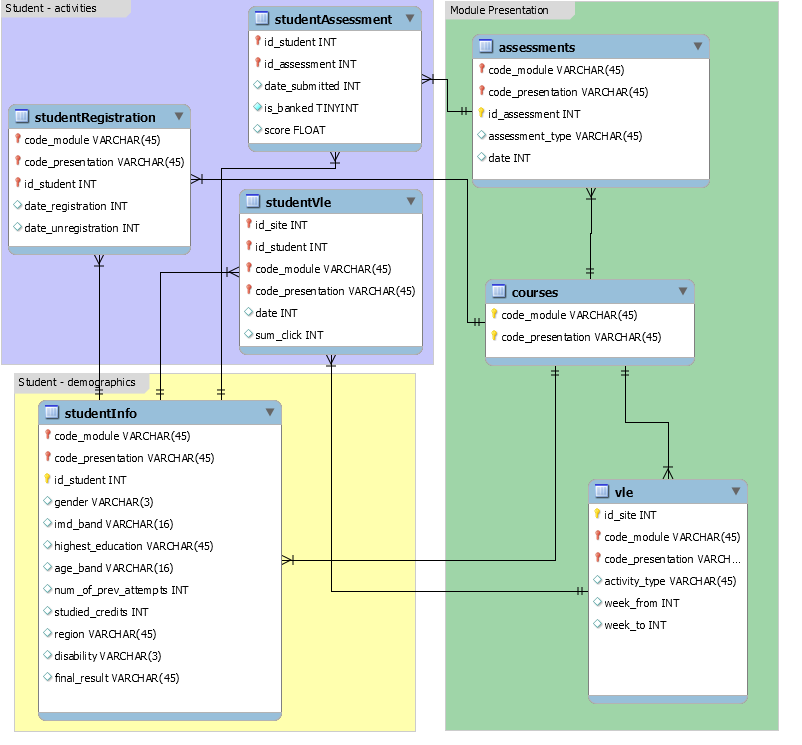
<center>Figure 1: Open Learning Analytics Database Schema</center>

Figure 1 shows the relation between files/data in the open learning datasets. This relation would help choosing the apprpriate files/data. The task given is to predict the success of students and the required data to have would be as below:<br>
- The student's perfomance during their assessment/exams
- Their final result as this would help with the prediction
- The student's commitment on the course/module ie; The number of clicks 
- Type of assesments to possibly create new features
<br><br>
from the picture above, these information can be extracted from the following files:<br><br>
- Assesments
- studentAssesment
- studentInfo
- studentVle
- vle
<br><br>
These files would be assigned and further feature engineering would be executed

## Task A: 

### Assigning Files

In [66]:
studInfo = pd.read_csv(r"C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\studentInfo.csv") 
assments = pd.read_csv(r"C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\assessments.csv") 
studAssments = pd.read_csv(r"C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\studentAssessment.csv") 
vle = pd.read_csv(r"C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\vle.csv") 
studVle = pd.read_csv(r"C:\Users\Asus\Desktop\DataSets\OpenUni\anonymiseddata\studentVle.csv") 


### Feature Engineering
This section will discuss on how the data was used to create new features that will be used in the remaining task

#### Assessments and StudentAssessment
There are 3 types of assessment from the assessments file and that would be Tutor Marked Assesment, Computer Marked Assesment and Final Exams. As this prediction would be on the students that would withdrawn or further on failing their courses, the Final Exams would be voided as it would not help us with the withdrawn students.<br> 2 features would be created from both assessment and student assessment files. One would be the average weighted grade and the other one would be the passing rate based on the students assessment score.<br> The weighted grade would be calculated by being a product of score and weight for each type of assesment and divide it by 100. This would then be average across all student for each module to gain the average weighted grade ( Accumulcative Assessment grade ) for each student per module.<br> The passing rate would then be benchmarked at 40 for each assessment and the cumulative pass/fail by a student would result in the passing rate features.<br>
- The average weighted grade will be called: weighted_grade
- The passing rate features will be called: pass_rate


In [67]:
#Seperating final exams with other assesement type
#We will have total amount of assesment except for final exam by code_module
exams=assments[assments["assessment_type"]=="Exam"]
others=assments[assments["assessment_type"]!="Exam"]
amounts=others.groupby(["code_module","code_presentation"]).count()["id_assessment"] 
amounts=amounts.reset_index()
amounts.head()


,code_module,code_presentation,id_assessment
0,AAA,2013J,5
1,AAA,2014J,5
2,BBB,2013B,11
3,BBB,2013J,11
4,BBB,2014B,11


In [68]:
# a function to determine the passing grade 
def pass_fail(grade):
    if grade>=40:
        return True
    else:
        return False

In [69]:
#creating a new dataframe that join assesments (excluding exams) by student and check the passing grade
stud_ass=pd.merge(studAssments,others,how="inner",on=["id_assessment"])
stud_ass["pass"]=stud_ass["score"].apply(pass_fail)
stud_ass["weighted_grade"]=stud_ass["score"]*stud_ass["weight"]/100 

In [70]:
#Final assessment average per student per module
avg_grade=stud_ass.groupby(["id_student","code_module","code_presentation"]).sum()["weighted_grade"].reset_index()
avg_grade.head()

,id_student,code_module,code_presentation,weighted_grade
0,6516,AAA,2014J,63.50
1,8462,DDD,2013J,34.90
2,8462,DDD,2014J,43.00
3,11391,AAA,2013J,82.40
4,23629,BBB,2013B,16.69


In [71]:
#Pass rate per student per module
pass_rate=pd.merge((stud_ass[stud_ass["pass"]==True].groupby(["id_student",
                                                              "code_module",
                                                              "code_presentation"]).count()["pass"]).reset_index(),
                   amounts,how="left",on=["code_module","code_presentation"])
pass_rate["pass_rate"]=pass_rate["pass"]/pass_rate["id_assessment"]
pass_rate.drop(["pass","id_assessment"], axis=1,inplace=True)
pass_rate.head()

,id_student,code_module,code_presentation,pass_rate
0,6516,AAA,2014J,1.000000
1,8462,DDD,2013J,0.500000
2,8462,DDD,2014J,0.666667
3,11391,AAA,2013J,1.000000
4,23629,BBB,2013B,0.363636


#### VLE and StudentVLE

This is regarding the student participation in the virtual learning enviroment. This will be used to determine the student commitment towards their courses. This will allow us to see how much does a student click/engage with the virtual learning enviroment in the daily. There will be 2 features to be used from both files and that would be the average amount of click a student would use on their respective courses materials and the average amount of time a student took to use the material from the start of their respective courses

In [72]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [73]:
#looking at the 1121 non null values from 6364 entries
vle[~vle["week_from"].isna()]


,id_site,code_module,code_presentation,activity_type,week_from,week_to
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
264,877040,AAA,2014J,oucontent,2.0,2.0
323,877045,AAA,2014J,oucontent,1.0,1.0
...,...,...,...,...,...,...
6243,798728,GGG,2014B,resource,1.0,1.0
6266,897051,GGG,2014J,resource,2.0,2.0
6285,897121,GGG,2014J,resource,1.0,1.0
6304,897050,GGG,2014J,resource,1.0,1.0


There is too little information regarding the week_from till week_to to use it as a metric for student commitments throughout the the weeks. Therefore, it will be voided and the dates from the studentVle would be used instead

In [74]:
studVle.head()

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


In [75]:
#Here we can track the average time after the start of the course the student took to use the materials
#and the average amount of clicks per material
avg_per_site=studVle.groupby(["id_student","id_site","code_module","code_presentation"]).mean().reset_index()
avg_per_site.head()

,id_student,id_site,code_module,code_presentation,date,sum_click
0,6516,877011,AAA,2014J,210.333333,3.833333
1,6516,877012,AAA,2014J,90.833333,2.310606
2,6516,877015,AAA,2014J,113.461538,2.000000
3,6516,877023,AAA,2014J,122.666667,2.000000
4,6516,877025,AAA,2014J,41.142857,4.333333


In [76]:
#General average of date and summation of click per student per module
avg_per_student=avg_per_site.groupby(["id_student","code_module","code_presentation"]).mean()[["date",
                                                                                               "sum_click"]].reset_index()
avg_per_student.head()

,id_student,code_module,code_presentation,date,sum_click
0,6516,AAA,2014J,105.292573,5.816135
1,8462,DDD,2013J,38.794704,1.734524
2,8462,DDD,2014J,10.000000,3.000000
3,11391,AAA,2013J,111.739069,4.231515
4,23629,BBB,2013B,33.409632,2.817316


#### StudentInfo
There is no further manipulation of data needed from this files. However, there are two features needed from the files and that would be:
- The final results (for prediction scores/accuracy)
- The number of attempts on the modules

In [77]:
#looking at the neccessary files from student info.
studInfo=studInfo[["code_module","code_presentation","id_student","num_of_prev_attempts","final_result"]]
studInfo.head()

,code_module,code_presentation,id_student,num_of_prev_attempts,final_result
0,AAA,2013J,11391,0,Pass
1,AAA,2013J,28400,0,Pass
2,AAA,2013J,30268,0,Withdrawn
3,AAA,2013J,31604,0,Pass
4,AAA,2013J,32885,0,Pass


In [78]:
#merging all the files accordingly using an inner join 
merge1=pd.merge(studInfo, avg_grade, how="inner", on=["id_student","code_module","code_presentation"])
merge2=pd.merge(merge1,avg_per_student,how="inner", on=["id_student","code_module","code_presentation"]) 
finaldf=pd.merge(merge2, pass_rate, how="inner", on=["id_student","code_module","code_presentation"])
finaldf.drop(["id_student","code_module","code_presentation"],axis=1,inplace=True)
finaldf.head()

,num_of_prev_attempts,final_result,weighted_grade,date,sum_click,pass_rate
0,0,Pass,82.4,111.739069,4.231515,1.0
1,0,Pass,65.4,92.532356,3.541379,1.0
2,0,Pass,76.3,99.678124,3.658979,1.0
3,0,Pass,55.0,99.220225,2.821116,0.6
4,0,Pass,66.9,127.902446,3.490186,1.0


### EDA (Exploratory Data Analysis)

In [79]:
finaldf.describe()

,num_of_prev_attempts,weighted_grade,date,sum_click,pass_rate
count,25193.000000,25193.000000,25193.000000,25193.000000,25193.000000
mean,0.154567,49.744102,82.412779,2.643361,0.734981
std,0.464786,31.516234,39.447301,1.058499,0.321805
min,0.000000,0.000000,-24.416667,1.000000,0.076923
25%,0.000000,17.460000,52.677567,1.800545,0.500000
50%,0.000000,57.390000,90.180100,2.426932,0.909091
75%,0.000000,77.730000,109.784255,3.284757,1.000000
max,6.000000,100.000000,239.947024,28.440018,1.000000


In [80]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25193 entries, 0 to 25192
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_of_prev_attempts  25193 non-null  int64  
 1   final_result          25193 non-null  object 
 2   weighted_grade        25193 non-null  float64
 3   date                  25193 non-null  float64
 4   sum_click             25193 non-null  float64
 5   pass_rate             25193 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ MB


#### Data Integrity
The reason for joining the files using an inner joing is to avoid any null values being inserted in the files and it can be seen that there is no null values in the final dataframe.<br> 
#### Correlation Map
The correlation heatmap on Figure 2 shows that the average passing grade is highly correlated with the average weighted grade, the date( the average time spent on a material) and slightly correlated with the amount of clicks. This could mean that the passing grade depends on how long does the student spent on a materials the amount of clicks would also help in increasing the amount of time spent by a student.

Text(0.5, 1.0, ' Figure 2: Correlation Heat-map on Features used')

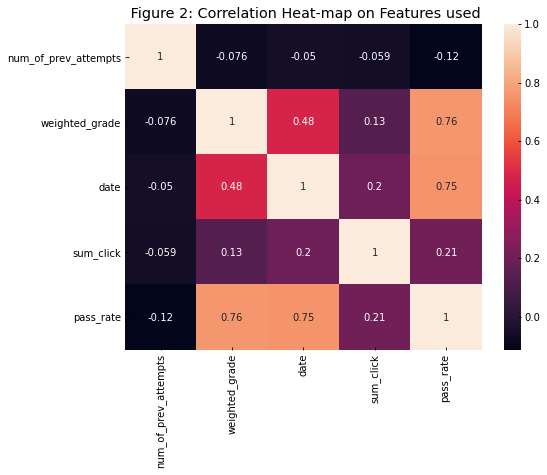

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(finaldf.corr(),annot=True)
plt.title(" Figure 2: Correlation Heat-map on Features used")

#### The count for each Final Results

Text(0.5, 1.0, 'Figure 3: The count for Final Results')

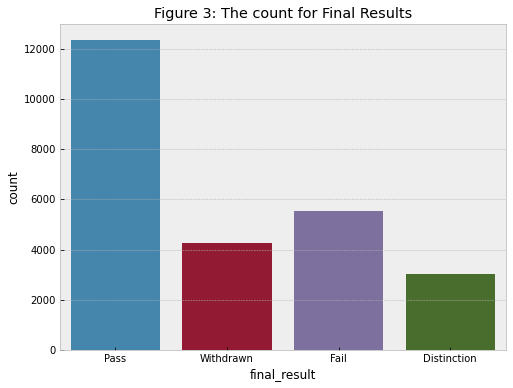

In [82]:
plt.figure(figsize=(8,6))
sns.countplot(data=finaldf, x="final_result")
plt.title("Figure 3: The count for Final Results")

#### Detecting Outliers
From the pairplot, it can be seen there is an outlier on the number of previous attempt column and the summation of click column. The outliers for the number of previous attempt would be all the data more than or equal to five while the summation of click would be all the data more than or equal to 20. This outliers would be ommitted as it would allow the use of MinandMaxScaler to be more efficient.  


Text(0.5, 1.08, 'Figure 4: Features Pairplot')

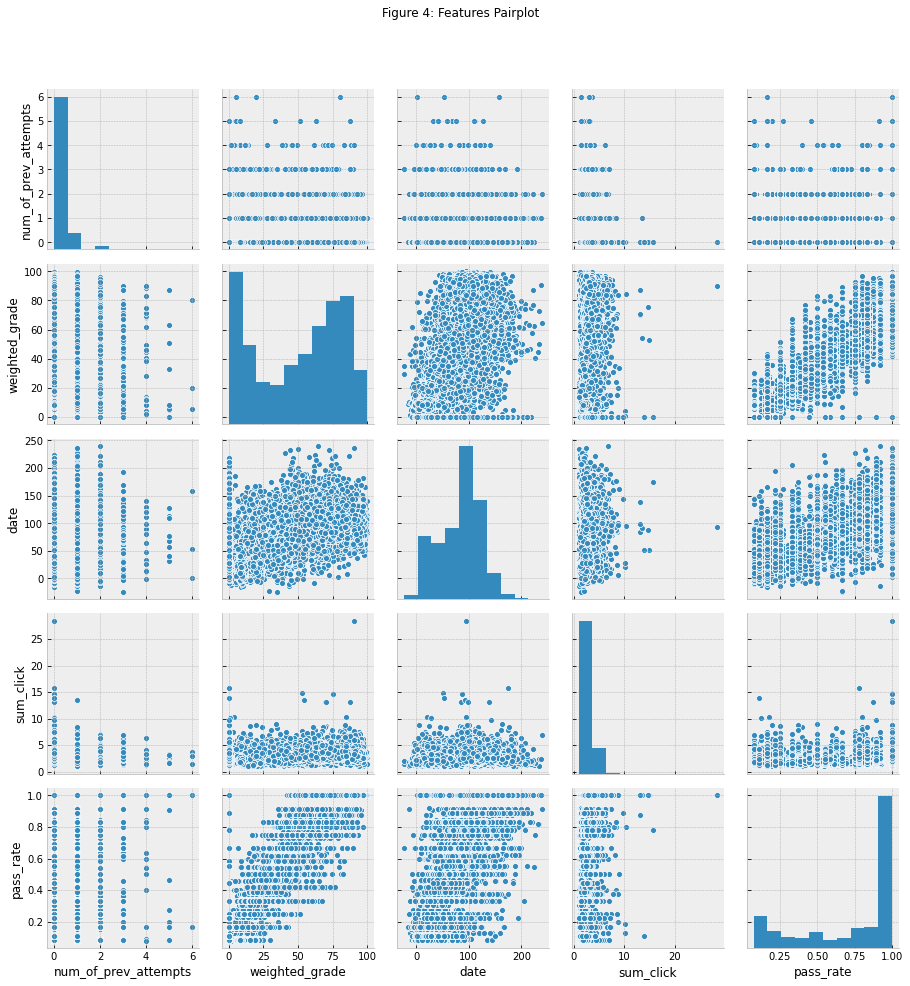

In [83]:
sns.pairplot(finaldf).fig.suptitle("Figure 4: Features Pairplot", y=1.08)


In [84]:
finaldf[finaldf["sum_click"]>=20]

,num_of_prev_attempts,final_result,weighted_grade,date,sum_click,pass_rate
15211,0,Pass,90.16,93.652794,28.440018,1.0


In [85]:
finaldf[finaldf["num_of_prev_attempts"]>=5]

,num_of_prev_attempts,final_result,weighted_grade,date,sum_click,pass_rate
2037,5,Fail,62.870,67.363310,1.725842,0.909091
3636,5,Withdrawn,5.000,57.376344,1.995968,0.181818
3833,5,Fail,4.800,76.333333,1.900000,0.272727
3869,6,Distinction,80.450,158.282468,3.657287,1.000000
6544,5,Fail,0.000,37.946602,2.578044,0.200000
6637,5,Pass,51.050,112.286698,3.316204,1.000000
10784,5,Fail,33.105,109.742363,1.749340,0.461538
10958,5,Withdrawn,5.500,31.308333,1.876667,0.166667
12330,6,Fail,5.500,0.244271,1.518337,0.166667
14505,5,Pass,87.300,127.634406,1.558457,1.000000


In [86]:
#getting rid of outliers
finaldf=finaldf[finaldf["sum_click"]<20]
finaldf=finaldf[finaldf["num_of_prev_attempts"]<5]
finaldf.head()

,num_of_prev_attempts,final_result,weighted_grade,date,sum_click,pass_rate
0,0,Pass,82.4,111.739069,4.231515,1.0
1,0,Pass,65.4,92.532356,3.541379,1.0
2,0,Pass,76.3,99.678124,3.658979,1.0
3,0,Pass,55.0,99.220225,2.821116,0.6
4,0,Pass,66.9,127.902446,3.490186,1.0


In [87]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25180 entries, 0 to 25192
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   num_of_prev_attempts  25180 non-null  int64  
 1   final_result          25180 non-null  object 
 2   weighted_grade        25180 non-null  float64
 3   date                  25180 non-null  float64
 4   sum_click             25180 non-null  float64
 5   pass_rate             25180 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ MB


## Task B:
### Unsupervised Learning ( Clustering )
Two clustering method is done to discover complex and undiscovered pattern on the data. This will further help the understanding of the datasets. Prior to creating the cluster models, the datasets will be scaled using the MinMaxScaler which will still retain the distribution shape of the datasets. This scaler will not reduce the importance of outliers but since the outliers has been ommited, the use of MinMaxScaler is justifiable. The two type of clusters would be the K-means clustering and the Agglomerative clustering. Each clustering metrics would be calculated as below:

- K-means clustering<br>
Elbow Method and Silohouette scores will be calculated to determine the number of clusters
- Agglomerative clustering<br>
A dendogram from Hierarchical clustering will be used to determine the number of cluster for agglomerative clustering

<br>
Each clusters will be analyzed using boxplot to see the pattern of the datasets






#### Data Scaling 

In [88]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
%matplotlib inline

X=finaldf.drop(["final_result"], axis = 1)
Xagc=finaldf.drop(["final_result"], axis = 1)
y=finaldf["final_result"]

In [89]:
#scaling the clusters data
scaler=MinMaxScaler()
Xclust=scaler.fit_transform(X)

In [90]:
#using the final result as labels
Labels=y
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('labels: ' + str(Labels_keys))

labels: ['Pass', 'Withdrawn', 'Fail', 'Distinction']


### K-means Clustering

Essentially, this algorithm will measure the distance between a point and the pre-determined k-number of centroid and assign the lowest value to the centroid or in other words, clusters. This means that a point in a cluster will have the lowest distance value compared to another cluster. This algorithm will only halt if:
- The centroid has stabilised, meaning there is no more change in the distance values for each points
- a pre-determined amount of iteration

In this task, the number of iteration was set to 30 as a it is an arbitary number between 10(default) to 100. 



#### Elbow Method 
Figure 5 shows that the optimum amount of clusters is 2

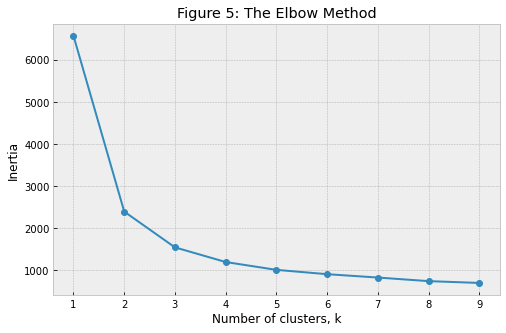

In [91]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Xclust)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Figure 5: The Elbow Method')
plt.xticks(ks)
plt.show()

#### Silhoutte Analysis
The Silhoutte scores also shows that the optimum value of clusters would be 2 clusters with 4 clusters being the second most value.

In [92]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Xclust)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Xclust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5698014029991573
For n_clusters=3, the silhouette score is 0.49166613359649747
For n_clusters=4, the silhouette score is 0.49863677214150376
For n_clusters=5, the silhouette score is 0.3840603231469649
For n_clusters=6, the silhouette score is 0.3857804655899907
For n_clusters=7, the silhouette score is 0.37581205016900204
For n_clusters=8, the silhouette score is 0.32751942405075923


#### Cluster Analysis 
The cluster table shows that the first cluster focuses on students that have Distinction and Pass results while the second cluster focuses on the students with the Fail and Withdrawn results. This shows a pattern that the student with the passing/distinction results have the same traits and vice versa with the passing/withdrawn students. Further Analysis could be seen on the box-plot

In [93]:
def k_means(n_clust, data_frame, true_labels, data_frame1):
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    data_frame1["cluster_id"]=c_labels
    display(ct)
    print('The Inertia Value is {0:.3f}.'.format(k_means.inertia_))
    print('The Silhoutte Score is {0:.3f}.'.format(silhouette_score(data_frame, y_clust, metric='euclidean')))

In [94]:
k_means(n_clust=2, data_frame=Xclust, true_labels=Labels, data_frame1=X)

orig_label,Distinction,Fail,Pass,Withdrawn
clust_label,,,,
0,2853,1961,11755,330
1,170,3583,594,3934


The Inertia Value is 2394.859.
The Silhoutte Score is 0.570.


#### Box-plot Analysis
From all four box-plots, the first clusters students are students that have a high average amount of assessents scores, a high passing rates, spent more time with the virtual learning enviroment and engage more with the materials provided. The second clusters however are students that are the opposite of the first clusters. This shows a pattern on how the university can intervene each student before they reach the failling/withdrawn status. The student that spent less time and shows the lack of participation should be intervene before they failed their courses.


Text(0.5, 1.0, 'Figure 6: Box-plot of Clusters with Weighted Grade')

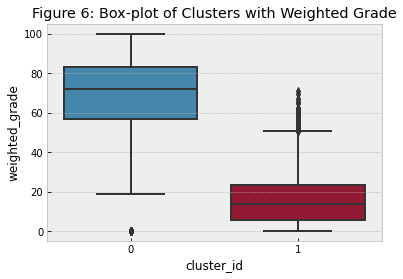

In [95]:
# Boxplot to visualise Cluster Id with weighted grade
sns.boxplot(x='cluster_id', y='weighted_grade', data=X)
plt.title('Figure 6: Box-plot of Clusters with Weighted Grade')

Text(0.5, 1.0, 'Figure 7: Box-plot of Clusters with Pass rate')

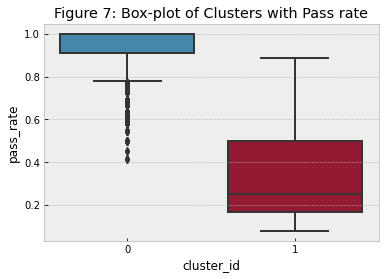

In [96]:
# Boxplot to visualise Cluster Id with pass rate
sns.boxplot(x='cluster_id', y='pass_rate', data=X)
plt.title('Figure 7: Box-plot of Clusters with Pass rate')

Text(0.5, 1.0, 'Figure 8: Box-plot of Clusters with Date')

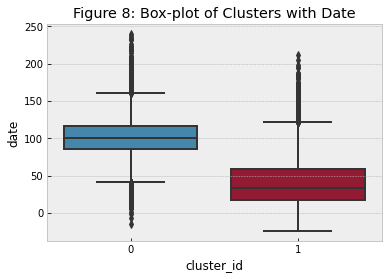

In [97]:
# Boxplot to visualise Cluster Id with date
sns.boxplot(x='cluster_id', y='date', data=X)
plt.title('Figure 8: Box-plot of Clusters with Date')

Text(0.5, 1.0, 'Figure 9: Box-plot of Clusters with Sum of Click')

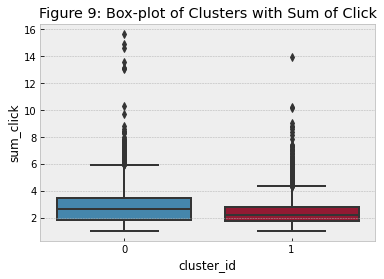

In [98]:
# Boxplot to visualise Cluster Id with sum click
sns.boxplot(x='cluster_id', y='sum_click', data=X)
plt.title('Figure 9: Box-plot of Clusters with Sum of Click')

### Agglomerative Clustering
Agglomerative clustering is a branch of hierchical clustering where it will treats each object which in this case a student as a singleton cluster. A cluster would then be paired based on their similarity and will continuously merge until it become one big cluster. This clustering works in a bottom-up manner.<br>

The similarity is calculated by measuring the distance between two points and this task will use **euclidean distance** as it measures. The distance information would then passed down to the linkage function where it would then measures the distance between clusters instead of points. This task would use the **ward method** as its linkage function. 


#### Dendogram
To determine the number of clusters, a dendogram from hierarchical clustering was used. The best method to calculate the distance between points is the Ward method. this can be seen from the example using the centroid method in Figure 10 where the blue line indicates that the number of clusters looking from the top is only 1 clusters.



In [99]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

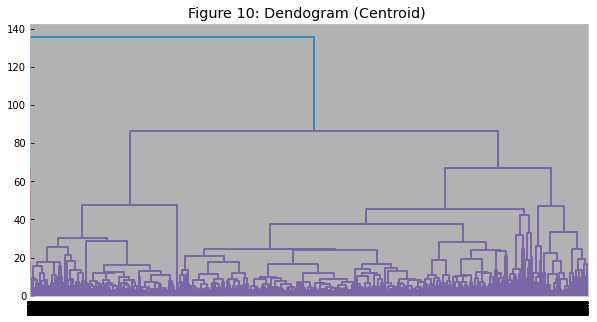

In [100]:
plt.figure(figsize=[10,5])
plt.title('Figure 10: Dendogram (Centroid) ')
dendo=shc.dendrogram(shc.linkage(X,method='centroid'))

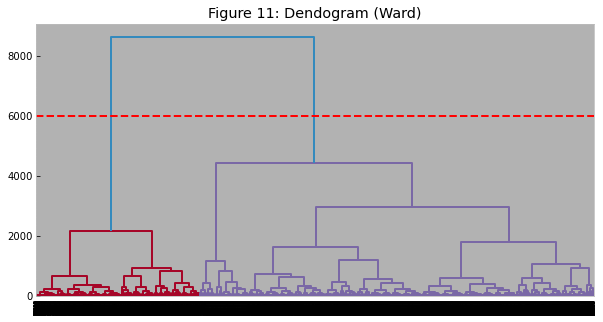

In [101]:
plt.figure(figsize=[10,5])
plt.title('Figure 11: Dendogram (Ward)')
plt.axhline(y=6000,color='r',linestyle='--')
dend=shc.dendrogram(shc.linkage(X,method='ward'))

#### Cluster Analysis
The cluster table indicates that the first clusters consists of students that are failing/withdrawn while the second clusters consist of students that obtained distinction/passing grades. This results is also parallel with the K-Means clustering Results. The box-plot for each features will be analysed.

In [102]:
def agc(n_clust, data_frame, true_labels,df2):
    agc = AgglomerativeClustering(n_clusters = n_clust, affinity='euclidean', linkage='ward')
    agc.fit(data_frame)
    c_labels = agc.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    df2["cluster_label"]=c_labels
   
   
    display(ct)

In [103]:
agc(n_clust=2, data_frame=Xclust, true_labels=Labels, df2=Xagc)

orig_label,Distinction,Fail,Pass,Withdrawn
clust_label,,,,
0,508,3831,1584,4016
1,2515,1713,10765,248


#### Box-plot Analysis
Since the results is parallel with the K-means clustering, it is forseeable that one cluster (the passing/distinction students) would have higher results in weighted grade, pass rate, time spent on materials and the amount of engagement. This means that there would be two type of students that should be analysed during the period of respective courses.

Text(0.5, 1.0, 'Figure 12: Box-plot of Clusters with Weighted Grade')

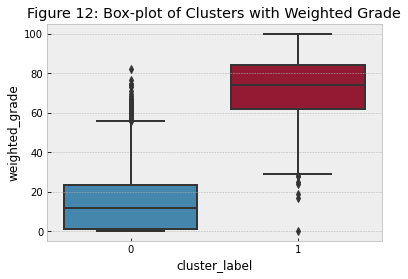

In [104]:
import seaborn as sns
# Boxplot to visualise Cluster Id with weighted grade
sns.boxplot(x='cluster_label', y='weighted_grade', data=Xagc)
plt.title('Figure 12: Box-plot of Clusters with Weighted Grade')

Text(0.5, 1.0, 'Figure 13: Box-plot of Clusters with Pass Rate')

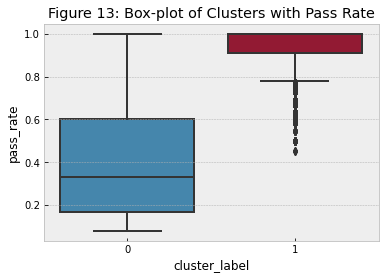

In [105]:
# Boxplot to visualise Cluster Id with pass_rate
sns.boxplot(x='cluster_label', y='pass_rate', data=Xagc)
plt.title('Figure 13: Box-plot of Clusters with Pass Rate')

Text(0.5, 1.0, 'Figure 14: Box-plot of Clusters with Date')

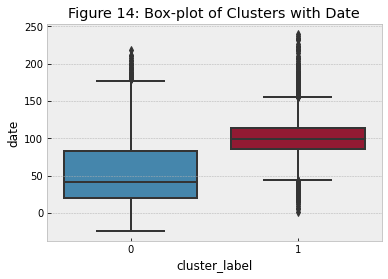

In [106]:
# Boxplot to visualise Cluster Id with date
sns.boxplot(x='cluster_label', y='date', data=Xagc)
plt.title('Figure 14: Box-plot of Clusters with Date')

Text(0.5, 1.0, 'Figure 15: Box-plot of Clusters with Sum of Click')

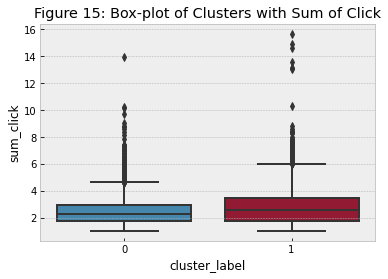

In [107]:
# Boxplot to visualise Cluster Id with sum_click
sns.boxplot(x='cluster_label', y='sum_click', data=Xagc)
plt.title('Figure 15: Box-plot of Clusters with Sum of Click')

### Unsupervised Learning Conclusion
Both unsupervised learning shows that the data could be reduced into 2 sets of cluster where the students with Distinction or passing grade should be in one cluster while the students with failing or withdrawn status should be in another clusters. This result would further help in accomodating the limitation in supervised learning, especiallly in regression algorithm 

## Task C:
### Supervised Learning (Prediction Model)
Supervised Learning is when you have an input variable with the desired output and learn the mapping function from the input to the output. In formula terms:<br>
Y = f(X)<br>
Supervised learning will learn from the training datasets and the predict the outcomes using the test datasets. The ratio of train and test for this task would be **70/30** for train/test size.
Supervised learning can be group into Regression and Classification problem. Since the output for this model is categorical, the regression model would be done using **Logistic Regression** while the classification model would be using **Random Forest**<br><br>
The perfomance metrics that would be use for this task would be taken from the classification_report library where it will calculate the Precision, Recall, F1-score and Support. The macro avg and the weighted avg would not be analysed. The simple explanation for each metrics would be as below:<br>
- Precision calculate how many of the true positive compare to the predicted positive<br>High Precision is needed when the cost of a false positive is high.
- Recall calculate on how many of the true positive compare to the actual positive. <br>High Recall is needed if the cost of a false negative is high
- F1-score is the balance between Precision and Recall
- Support counts the the number of given class in the datasets. This is to ensure that the datasets does not favor a class<br><br>

When it comes to predicting the failure of a student, the Recall should be the main priority as the model should not predict a failing student as a student with a passing grade. The second metrics that should be prioritise is the F1-score. 

In [108]:
# Set up all the needed library for Task C
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Model 1: Logistic Regression
Due to logistic regression by default can only predict in binary output, the founded pattern from Task B allows the method to still be used by reducing the **final_result** value into 2. The value would be reduced into:
- No_Intervention, consist of **Distinction and Pass**
- Intervention, consist of **Fail and Withdrawn**
<br><br>

A copy of the **finaldf** would be used to keep the originality of the initial data

In [109]:
#copy the finaldf dataframe
temp=finaldf.copy()
temp['final_result'].replace(['Distinction', 'Pass','Withdrawn','Fail'],
                             ['No_Intervention','No_Intervention','Intervention','Intervention'],inplace=True)


In [110]:
# Assign the value needed for logistic regression
x1=temp.drop(["final_result"], axis = 1)
y1=temp["final_result"]
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3)

#scaling the Input values
scaler1=MinMaxScaler()

X_train=scaler1.fit_transform(X_train)
X_test=scaler1.fit_transform(X_test)

#### Classification Report Analysis (Logistic Regression)
The classification report on the Logistic Regression propose that the model is 90% accurate with both classes have a high value of Recall Scores. On top of that, The F1-score for both classes are also high and thus this model is suited when the data is being reduced to Intervention and No intervention. 

In [111]:
#logistic regression 
lr1=LogisticRegression(max_iter=10000)
lr1.fit(X_train,y_train)
result_lr1=lr1.predict(X_test)
print(confusion_matrix(y_test,result_lr1))
print("\n")
print(classification_report(y_test,result_lr1))

[[2360  597]
 [ 212 4385]]


                 precision    recall  f1-score   support

   Intervention       0.92      0.80      0.85      2957
No_Intervention       0.88      0.95      0.92      4597

       accuracy                           0.89      7554
      macro avg       0.90      0.88      0.88      7554
   weighted avg       0.89      0.89      0.89      7554



#### Feature Importance ( Logistic Regression)
Logistic regression feature importance on Figure 16 stated that the positive values indicates features that predict the intervention class and the negative value predict the No_intervention class. Since this is a logistic regression method, further analysis/pattern could not be analysed.  

In [112]:
print(x1.columns)
values =x1.columns

Index(['num_of_prev_attempts', 'weighted_grade', 'date', 'sum_click',
       'pass_rate'],
      dtype='object')


Feature: 0, Score: -1.77344
Feature: 1, Score: 1.98653
Feature: 2, Score: 8.08610
Feature: 3, Score: -1.19587
Feature: 4, Score: 5.25148


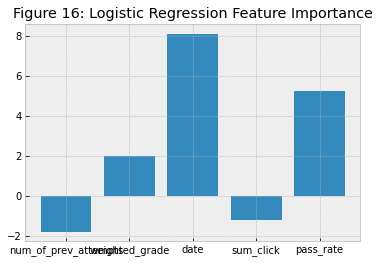

In [113]:
from matplotlib import pyplot
# get importance
importance = lr1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar(values, importance)
pyplot.title("Figure 16: Logistic Regression Feature Importance")
pyplot.show()

### Model 2: Random forest
Random forest is an ensemble of decision tree where it is trained with the bagging method. Essentially, bagging method means a collection of supervised model will create a more accurate and stable prediction. The reason random forest is used instead of a decision tree is to avoid an overfitting model as a random forest would randomly select features and observation to build an ensemble of decision tree and calculate the mean of the results from each random decision tree. However, this slows down the computing process.<br><br>
The Random forest will be used on two datasets. The first datasets would be the same as the logistic regression datasets where the final results is grouped into two clusters of Intervention and No-Intervention. The second datasets however will be used to predict the original datasets with the final result as distinction, pass, fail and withdrawn

#### Random Forest 1: Two Clusters
#### Classification Report Analysis ( Random Forest: 2 Clusters)
<br>The classification report is slightly similar with the logistic regression as both accuracy hold the same value at 90%. However, the Random forest has better f1-score for both classes.

In [114]:
#train_test split 
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.3)

#random forest model 1
rf1=RandomForestClassifier(n_estimators=300)
rf1.fit(X_train,y_train)
result_rf1=rf1.predict(X_test)
print(confusion_matrix(y_test,result_rf1))
print("\n")
print(classification_report(y_test,result_rf1))


[[2429  494]
 [ 219 4412]]


                 precision    recall  f1-score   support

   Intervention       0.92      0.83      0.87      2923
No_Intervention       0.90      0.95      0.93      4631

       accuracy                           0.91      7554
      macro avg       0.91      0.89      0.90      7554
   weighted avg       0.91      0.91      0.90      7554



#### Feature Importance (Two Clusters)
Random Forest has a built in function called feature_importances where it will gives the importances values for each features.This is easier than logistic regression where the importances comes from the coefficient and does give any important patterns.<br>The feature importance on Figure 17 state that the num of previous attempt hold the least weight on predicting the two classes while the passing rate hold the highest value. This means that the passing rate would highly determine the performance and the tendecy of a student to either achieve a passing/distinction grade or fail/withdrawn the course.

In [116]:
importance1 = pd.DataFrame({'feature':x1.columns,'importance':np.round(rf1.feature_importances_,3)})
importance1 = importance1.sort_values('importance',ascending=False).set_index('feature')

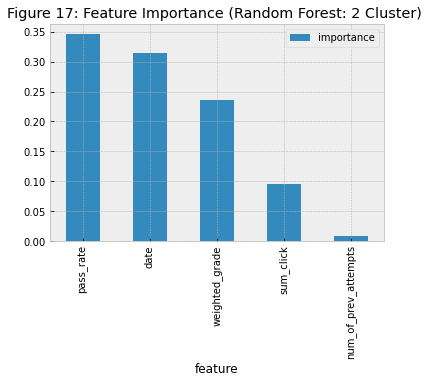

In [117]:
importance1.plot.bar(title="Figure 17: Feature Importance (Random Forest: 2 Cluster) ")

#### Random Forest 2: initial data
The second random forest model consist the original final result data as prediction top further helps understanding student perfomances.

In [118]:
# data preparation
Xrf=finaldf.drop(["final_result"], axis = 1)
yrf=finaldf["final_result"]
X_train, X_test, y_train, y_test = train_test_split(Xrf, yrf, test_size=0.3)

#scaling the Input values
scaler2=MinMaxScaler()

X_train=scaler2.fit_transform(X_train)
X_test=scaler2.fit_transform(X_test)


#### Classification Report Analysis ( Random Forest: Initial Data)
In this Random Forest Model, only the Pass class has significant value of all metrics(precision, recall and f1-score). This could mean that the model is overfitting and thus despite having a good accuracy of 66%, the overall results shows that the data is imbalanced. This could be due to the initial dataset is filled with students with a passing grade compared to the other classes. This also proves how data reduction plays major role in increasing the performance of a model.  

In [119]:
#random forest model 2
rf1=RandomForestClassifier(n_estimators=300)
rf1.fit(X_train,y_train)
result_rf1=rf1.predict(X_test)
print(confusion_matrix(y_test,result_rf1))
print("\n")
print(classification_report(y_test,result_rf1))


[[ 375    5  508    5]
 [  13  689  479  499]
 [ 316  138 3226   14]
 [   2  459   53  773]]


              precision    recall  f1-score   support

 Distinction       0.53      0.42      0.47       893
        Fail       0.53      0.41      0.46      1680
        Pass       0.76      0.87      0.81      3694
   Withdrawn       0.60      0.60      0.60      1287

    accuracy                           0.67      7554
   macro avg       0.60      0.58      0.59      7554
weighted avg       0.65      0.67      0.66      7554



#### Feature Importance (Initial Data)
the feature importance on Figure 18 indicates that the number of students attempts does not hold a lot of weight in the prediction results while the amount of time a student took on their materials hold the highest weight. This would mean that based on both Random Forest Model Feature Importance, the number of previous attempts could be omitted from the model to further increase the model perfomance

In [120]:
importance2 = pd.DataFrame({'feature':Xrf.columns,'importance':np.round(rf1.feature_importances_,3)})
importance2 = importance2.sort_values('importance',ascending=False).set_index('feature')

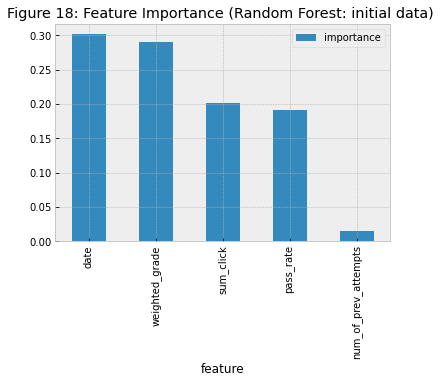

In [121]:
importance2.plot.bar(title="Figure 18: Feature Importance (Random Forest: initial data) ")

#### Supervised Learning Conclusion
Based on both Logistic Regression method and Random Forest method, The best model for predicting the students perfomances would the Random Forest Model as it has a slightly higher value of f1-score. On top of that, the flexibility of random forest to generate feature importance would help the education industry to tackle the problem regarding students that would need intervention before failing/withdrawing their courses/modules.

## Conclusion

It can be concluded that the given datasets from Open Learning Analytics could help in predicting the students final results/perfomances. Understanding the database schema helps in the feature engineering to create features that would help in both supervised and unsupervised analysis.<br><br>Task B which is regarding the unsupervised learning shows pattern that would group the 4 type of final results into 2 clusters which were named intervention and no intervention. The cluster propose that there are students with certain features values would need intervention beforehand to prevent them from failing/withdrawn their courses/modules.On top of that, the unsupervised learning reduced the data which allows both Logistic Regression and Random Forest to gives good accuracy while having a balanced data prediction.<br><br> The supervised learning would then use the reduced data to create a prediction model. The usage of the reduced data would be crucial as the random forest model with the initial data does not give either a more accurate data or a balanced data prediction.The chosen model for this task would be **Random Forest model 1 (2 Clusters)** as it gives a slightly better prediction while also gives out the importance of certain features which would allow the education industry to tackle the problem regarding the features with the highest weight which in this case is the passing rates. The education industry could intervene with students who struggles with their assessments to prevent them from failing the courses/modules<br>
#### Recommendation and Improvement
Despite having an accuracy of 90% on the prediction models, improvements could be made to further increase the integrity of the model. One of the improvement would be to find better feature from the datasets such as the amount of acitivity engage from a student on the Virtual Learning Environment.Besides that, the implication of a more complex prediction model could further increase the potential in obtaining a model that is accurate and stable. The logistic regression for example is limited as it can only be used to predict binary classes. The availability of multi-class logistic regression is there but it would manipulate the existing data even more compare to the clustering method. Therefore, the implication of a neural network or deep learning would greatly increase the prediction model potential. The
